# Preprocess mask

Combine the multiple labels into 10 categories (for now):
- hard coral
- hard coral bleached
- dead coral
- other invertebrates
- sand/rubble
- other
- algae
- seagrass
- unknown
- no label

## Imports

In [20]:
# load custom scripts
from preprocess_inference import *

# import the necessary packages
from imutils import paths
from PIL import Image
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')

## Load masks

In [21]:
scene = 'scene_0'

In [22]:
# load the masks paths
maskPaths = sorted(list(paths.list_images("/data/jantina/CoralNet/inference/segmentation_masks/"+scene)))

## New label classes

In [23]:
classes = {1: 'hard coral',
           2: 'hard coral bleached',
           3: 'dead coral',
           4: 'other invertebrates',
           5: 'sand/rubble',
           6: 'other',
           7: 'algae',
           8: 'seagrass',
           9: 'unknown',
           0: 'no label'
          }

### Merging labels

In [24]:
pd.read_csv('/data/jantina/CoralNet/inference/labelclasses.csv',usecols=["name","labelclass_index"])

,name,labelclass_index
0,Branching Dead Unknown,1
1,Massive Dead Uknown,2
2,Encrusting Dead,3
3,Dead Unknown,29
4,Acropora Unknown,5
5,Stylophora Unknown,6
6,Stylophora Pistillata,7
7,Stylophora Wellsi,8
8,Pocilopora Unknown,9
9,Pocilopora Verrucosa,10


In [25]:
hard_coral = [4,5,6,7,8,9,10,11,12,13,14,17,18,118]

hard_coral_bleached = []

dead_coral = [1,2,3,29]

other_invertebrates = [15,16]

sand_rubble = [20,21,24]

other = [22,23,185]

algae = [25]

seagrass = []

unknown = [19]

no_label = []

## Creating new labels + cropped images and saving to disk

In [26]:
startTime = time.time()

for masks in maskPaths:
    mask = io.imread(masks)
    new_mask = merge_mask(mask)
    im = Image.fromarray(new_mask) 
    maskPath = '/data/jantina/CoralNet/inference/labels/'+scene+'/' + masks.split(os.path.sep)[-1]
    im.save(maskPath)
    
endTime = time.time()
print("[INFO] total time taken to write the new masks: {:.2f}s".format(endTime - startTime))

[INFO] total time taken to write the new masks: 0.12s


In [27]:
startTime = time.time()

# load the image paths corresponding to the images
directory = "/data/jonathan/labeling_test/"+scene+"/"

# iterate over the selected test image paths
for masks in maskPaths:
    y = int(masks.split(os.path.sep)[-1].split("_")[1])
    x = int(masks.split(os.path.sep)[-1].split("_")[2].split(".")[0])
    name = masks.split(os.path.sep)[-1].split("_")[0] + ".png"
    image = io.imread(directory+name)[y:y+500,x:x+800]
    im = Image.fromarray(image)
    imagePath = '/data/jantina/CoralNet/inference/images/'+scene+'/' + masks.split(os.path.sep)[-1].split('.tif')[0]
    im.save(imagePath)

endTime = time.time()
print("[INFO] total time taken to write the new masks: {:.2f}s".format(endTime - startTime))

[INFO] total time taken to write the new masks: 2.86s


In [38]:
classes = {
1: "Branching Dead Unknown",
2: "Massive Dead Uknown",
3: "Encrusting Dead",
29: "Dead Unknown",
5: "Acropora Unknown",
6: "Stylophora Unknown",
7: "Stylophora Pistillata",
8: "Stylophora Wellsi",
9: "Pocilopora Unknown",
10: "Pocilopora Verrucosa",
11: "Pocilopora Damicornis",
12: "Seriatopora Hystrix",
4: "Branching Unknown",
118: "Lobophyllia Unknown",
13: "Massive Unknown",
14: "Encrusting Unknown",
15: "Soft Coral Unknown",
17: "Millepora Alcicornis",
18: "Millepora Dichotoma",
16: "Hydrozoans Unknown",
19: "Unidentifiable",
20: "Sand",
21: "Rock",
22: "Fish",
23: "Human",
24: "Background",
25: "Macroalgae",
185: "Trash",
0: "Unkown"
    }

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000001_0_800.png.tif


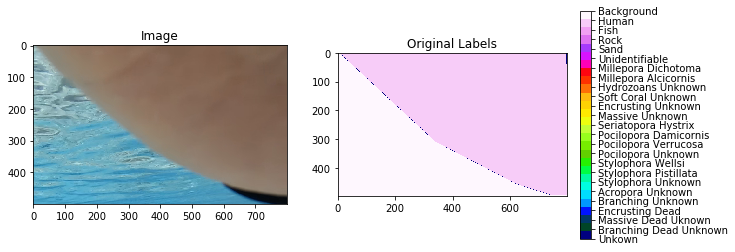

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000001_500_800.png.tif


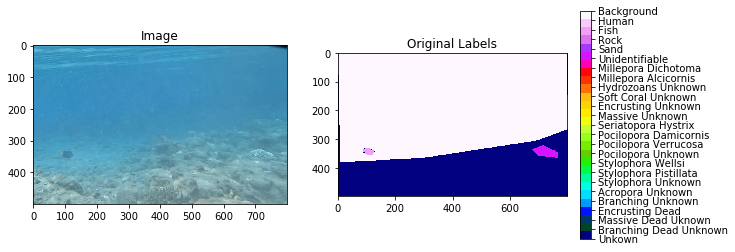

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000005_580_1120.png.tif


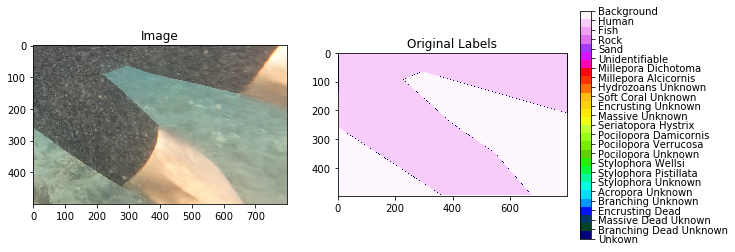

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000007_0_1120.png.tif


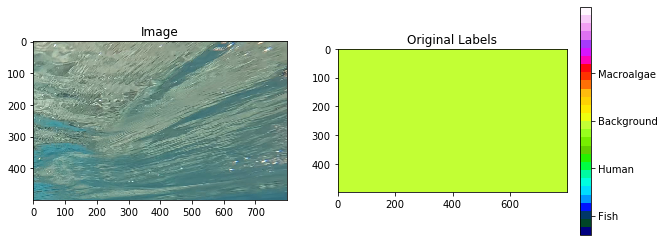

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000007_500_1120.png.tif


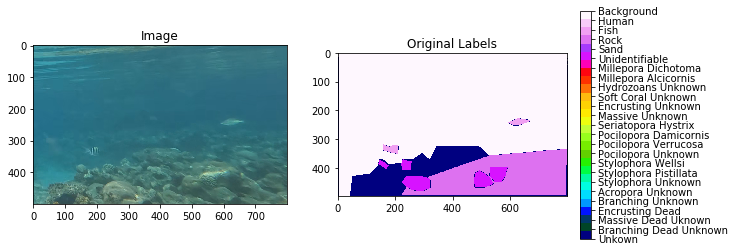

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000012_0_800.png.tif


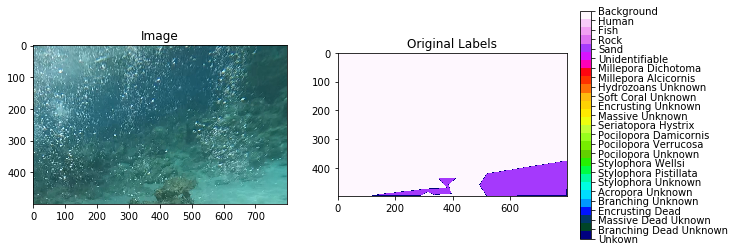

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000012_580_1120.png.tif


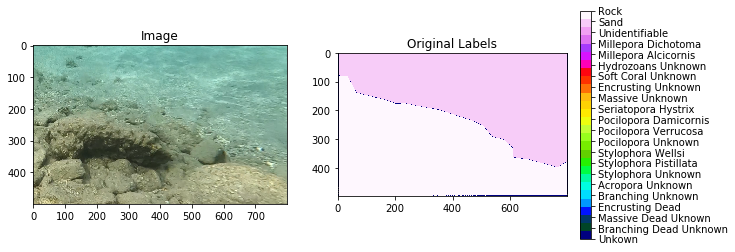

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000013_0_800.png.tif


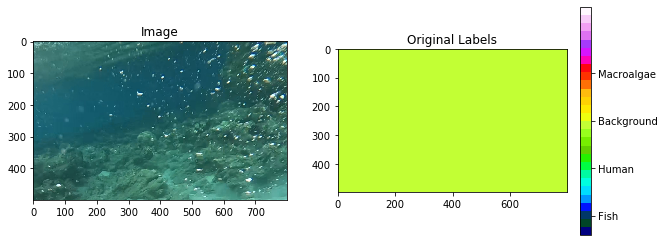

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000023_0_1120.png.tif


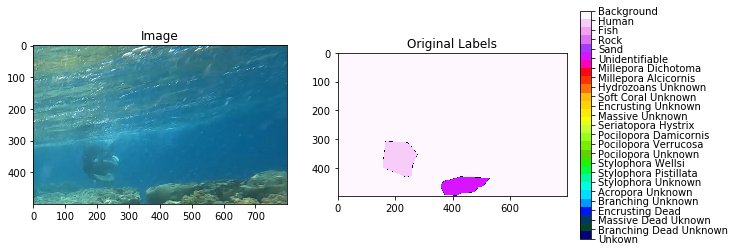

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000023_580_1120.png.tif


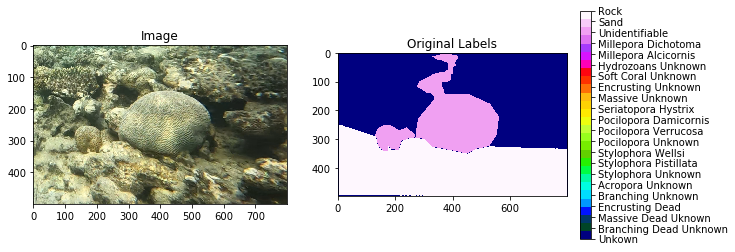

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000023_580_800.png.tif


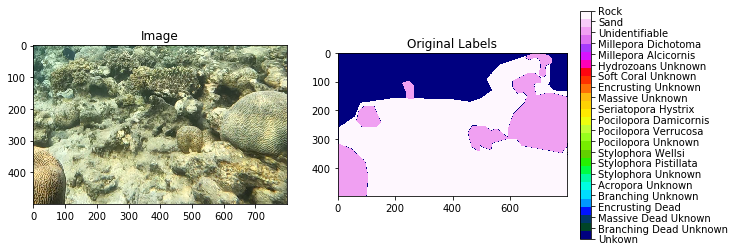

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000029_580_0.png.tif


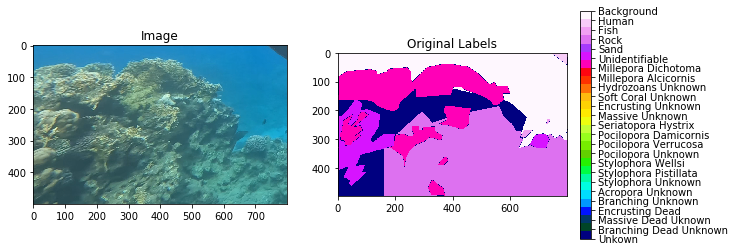

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000030_500_0.png.tif


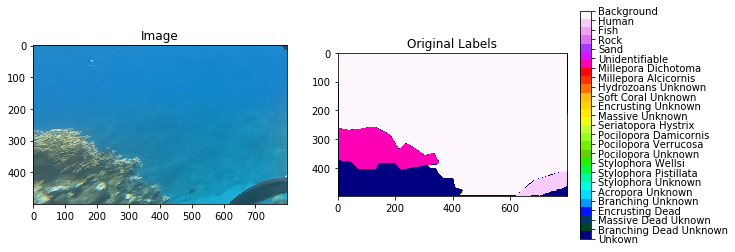

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000031_580_0.png.tif


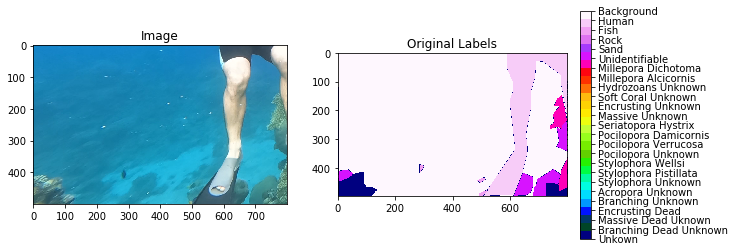

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000032_580_0.png.tif


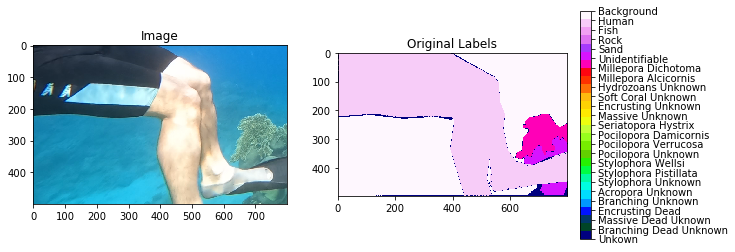

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000033_580_0.png.tif


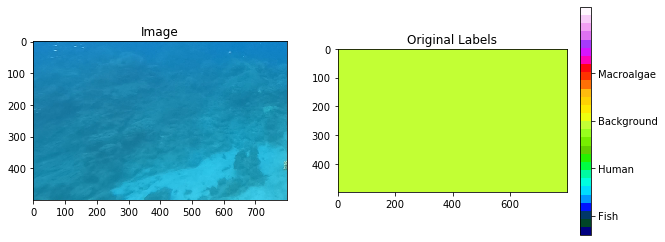

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000034_0_800.png.tif


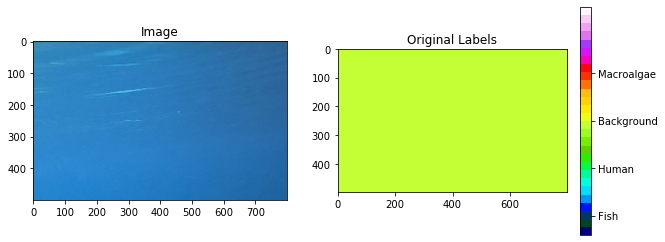

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000035_0_0.png.tif


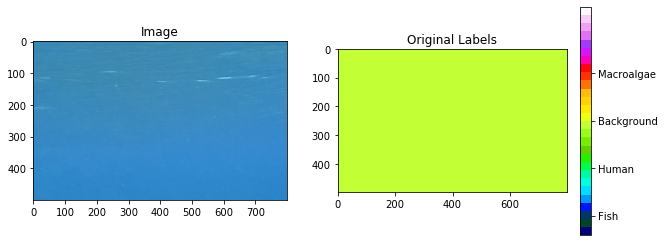

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000035_500_1120.png.tif


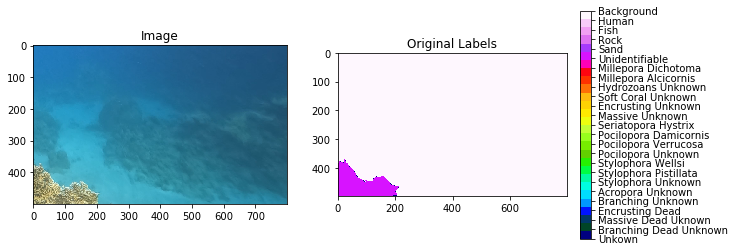

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000038_0_1120.png.tif


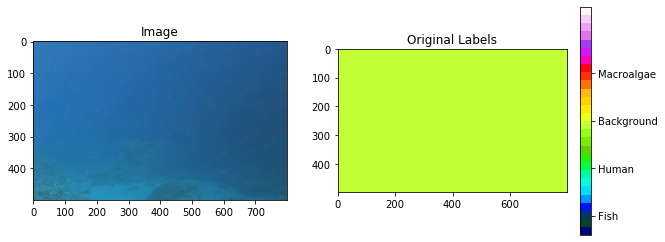

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000038_0_800.png.tif


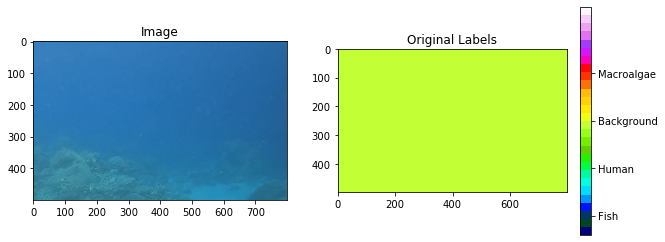

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000038_580_1120.png.tif


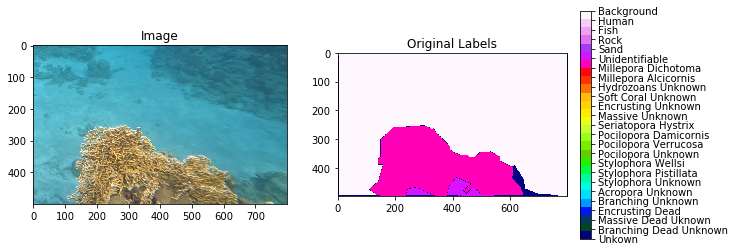

/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000038_580_800.png.tif


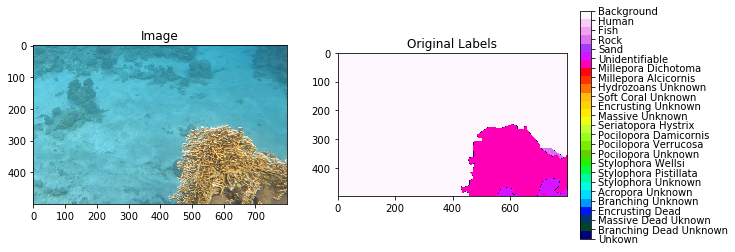

In [68]:
maskPaths = sorted(list(paths.list_images("/data/jantina/CoralNet/inference/segmentation_masks/"+scene)))

for masks in maskPaths:
    mask = io.imread(masks)
    imagePath = '/data/jantina/CoralNet/inference/images/'+scene+'/' + masks.split(os.path.sep)[-1].split('.tif')[0]
    image = io.imread(imagePath)
    print(masks)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    im1 = ax[0].imshow(image)
    im2 = ax[1].imshow(mask, cmap = plt.cm.get_cmap('gist_ncar', 28))

    # set the titles of the subplots
    ax[0].set_title("Image")
    ax[1].set_title("Original Labels")

    # add colour bar
    cbar = fig.colorbar(im2, ticks=list(classes.keys()), fraction=0.045)
    cbar.ax.set_yticklabels(list(classes.values()))

    # set the layout of the figure and display it
    plt.show()

In [69]:
mask = io.imread("/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000035_500_1120.png.tif")

In [70]:
np.unique(mask)

array([ 0, 19, 24], dtype=uint8)

In [71]:
from PIL import Image
im = Image.open("/data/jantina/CoralNet/inference/segmentation_masks/scene_0/0000035_500_1120.png.tif")
imarray = np.array(im)
np.unique(imarray)

array([ 0, 19, 24], dtype=uint8)

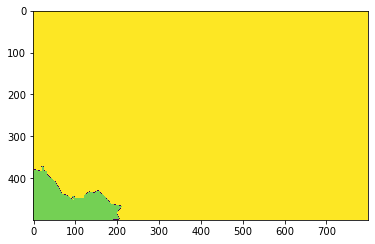

In [73]:
plt.imshow(mask)